Q1

In [1]:
# ----------------------------------
# 1. Importing Required Libraries
# ----------------------------------
# For numerical computations and array operations
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For visualizing missing values
import missingno as msno

# For interacting with the operating system (not directly used here but good to have)
import os

# For interactive plots
import plotly.express as px

# For creating subplots in plotly
from plotly.subplots import make_subplots

# For additional plotly graph objects
import plotly.graph_objects as go

# For data visualization with matplotlib
import matplotlib.pyplot as plt

# For data visualization with seaborn
import seaborn as sns

# Sklearn's default English stopwords
from sklearn.feature_extraction import text

# For sentiment analysis
from textblob import TextBlob

# Regular expressions
import re

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# For generating word clouds
from wordcloud import WordCloud

# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF Transformer
from sklearn.feature_extraction.text import TfidfTransformer

# For image handling (used for mask)
from PIL import Image
import requests

# NLTK corpus and lemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Tokenization and additional NLTK tools
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import wordnet

# For handling sparse matrices
from scipy.sparse import hstack

# For scaling numerical data
from sklearn.preprocessing import StandardScaler

# For splitting datasets
from sklearn.model_selection import train_test_split, cross_val_score

# For machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# For evaluating models
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Additional NLP tools
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Download POS tagger for English and other resources
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load Spacy model
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# --------------------------------------------
# 2. Loading Dataset and Initial Inspection
# --------------------------------------------
# Reading the CSV file into a DataFrame
review_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=[0])

In [3]:
# Displaying the first 5 rows of the DataFrame
review_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
# Checking the shape of the DataFrame (rows, columns)
review_df.shape

(23486, 10)

In [5]:
# Shows the percentage of null values in each column
review_df.isnull().sum() / len(review_df) * 100

,0
Clothing ID,0.000000
Age,0.000000
Title,16.222430
Review Text,3.597888
Rating,0.000000
Recommended IND,0.000000
Positive Feedback Count,0.000000
Division Name,0.059610
Department Name,0.059610
Class Name,0.059610


In [6]:
# Provides a summary of the DataFrame including column data types and non-null counts
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


Text(0.5, 1.0, 'Distribution of Missing Value (Before)')

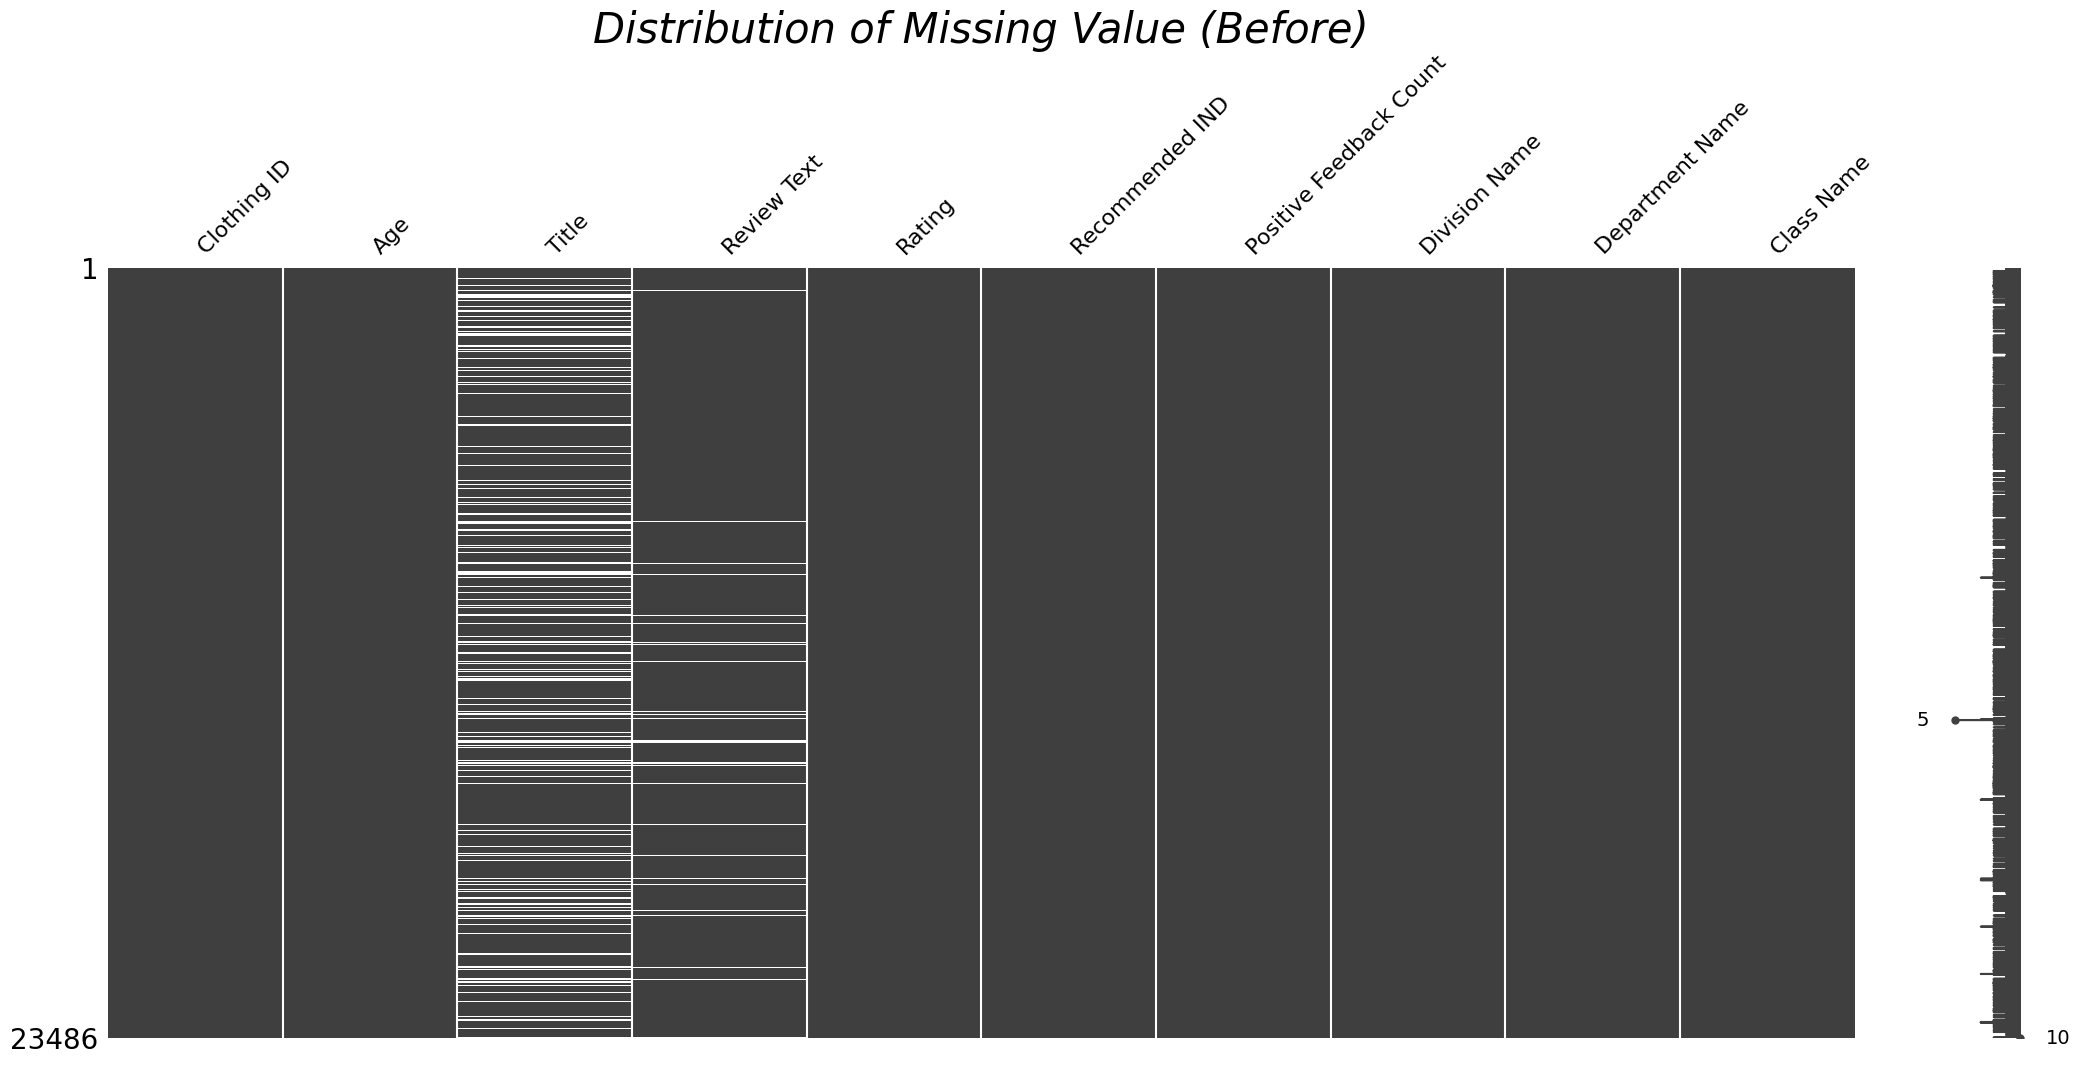

In [7]:
# Creates a matrix visualization of missing values in the dataset.
msno.matrix(review_df).set_title('Distribution of Missing Value (Before)', fontsize=30, fontstyle='oblique')

In [8]:
# -------------------------------------------------
# 3. Data Cleaning - Dropping Unnecessary Columns
# -------------------------------------------------
# Dropping the 'Clothing ID' column as it's not needed
review_df.drop(['Clothing ID'], axis=1, inplace=True)

In [9]:
# Dropping rows that are missing critical text columns such as 'Review Text', 'Division Name', 'Title'
review_df.dropna(subset=['Review Text', 'Division Name', 'Title'], inplace=True)

In [10]:
# Combining 'Title' and 'Review Text' into a single column 'Text' for more efficient text analysis
review_df['Text'] = review_df['Title'] + ' ' + review_df['Review Text']

In [11]:
# Resetting the index after dropping rows
review_df = review_df.reset_index().drop('index', axis=1)

In [12]:
# Creating a new column 'Text_Length' based on character count
review_df['Text_Length'] = review_df['Text'].apply(len)

In [13]:
# Printing the current shape after cleaning
print('Shape of DataFrame: ', review_df.shape)

Shape of DataFrame:  (19662, 11)


Text(0.5, 1.0, 'Distribution of Missing Value (After)')

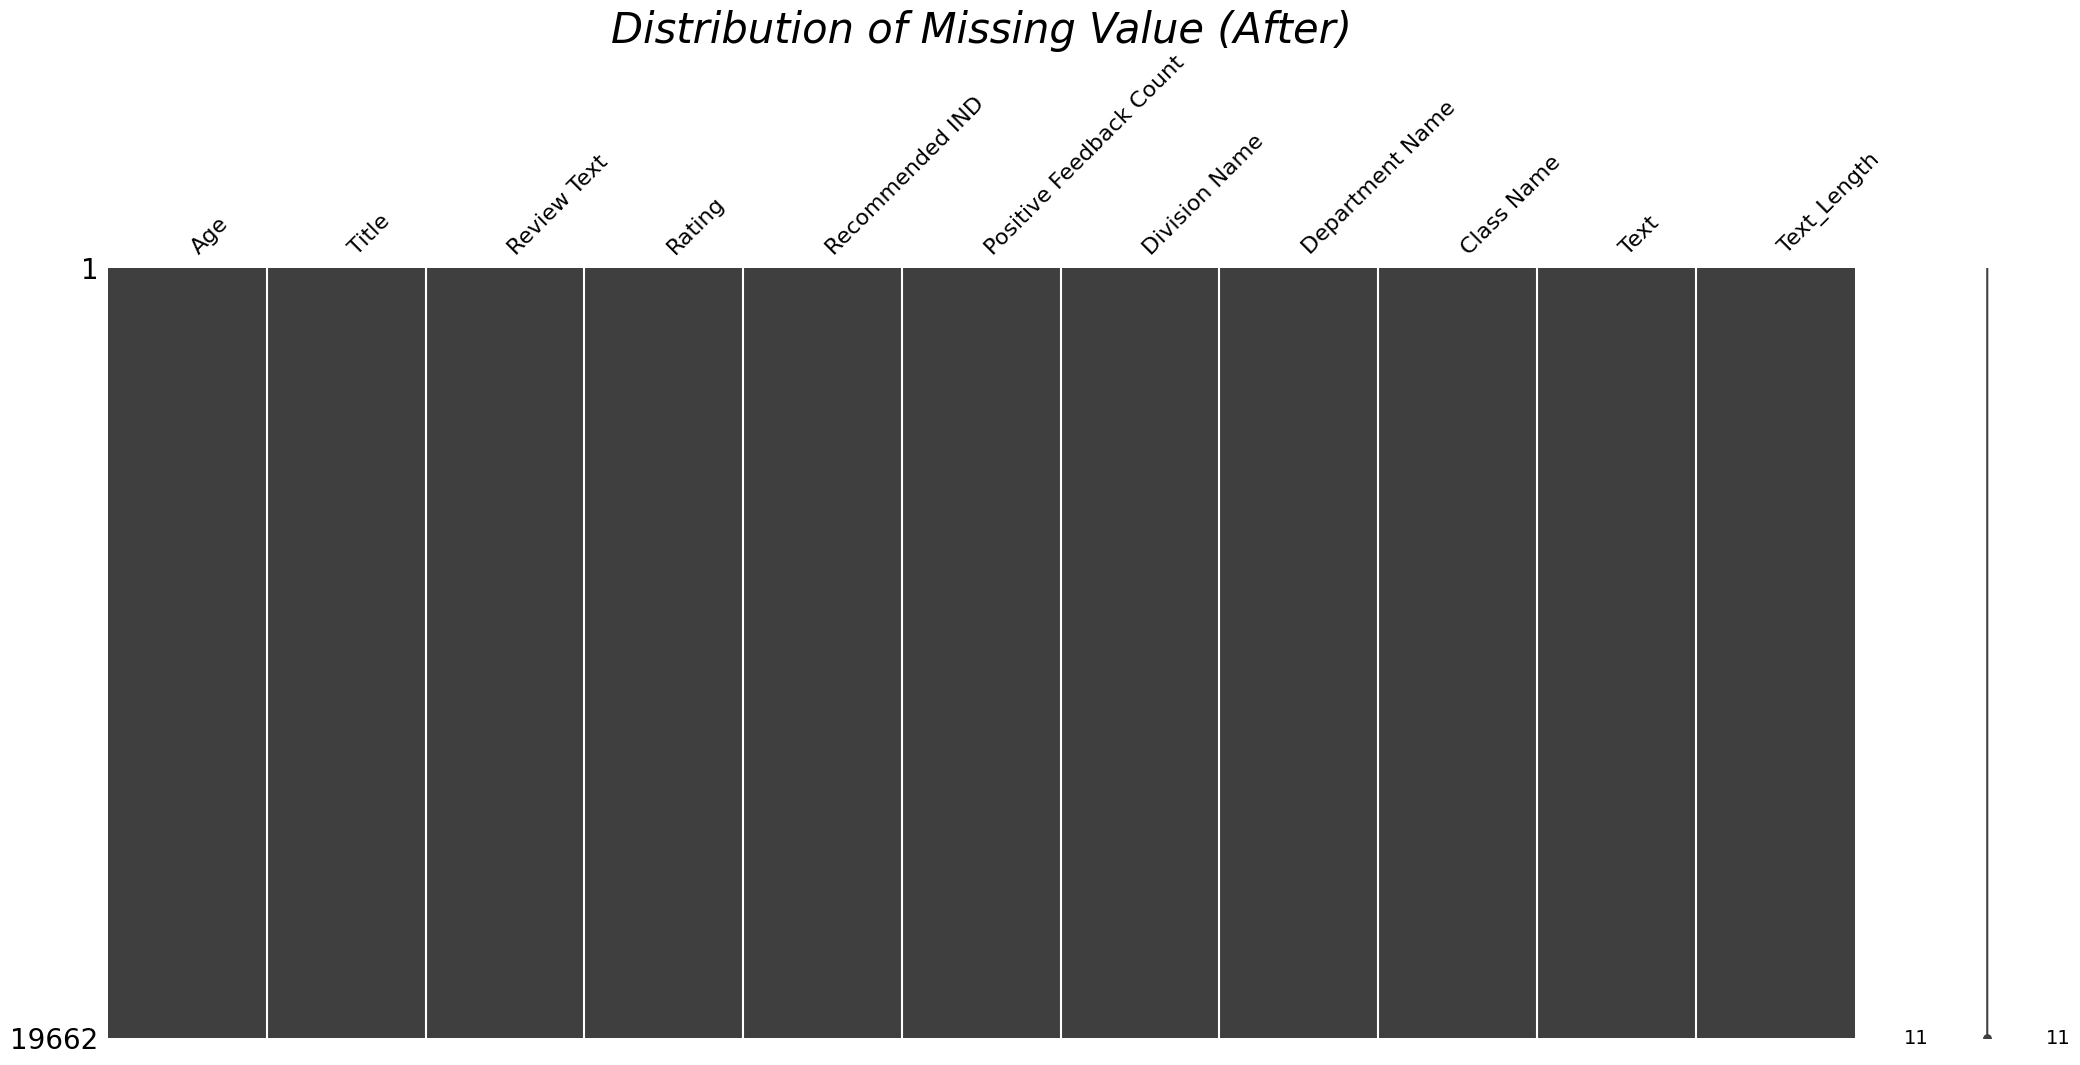

In [14]:
# Visualizing missing values after cleaning
msno.matrix(review_df).set_title('Distribution of Missing Value (After)', fontsize=30, fontstyle='oblique')

In [15]:
# Checking the percentage of null values after cleaning
review_df.isnull().sum() / len(review_df) * 100

,0
Age,0.0
Title,0.0
Review Text,0.0
Rating,0.0
Recommended IND,0.0
Positive Feedback Count,0.0
Division Name,0.0
Department Name,0.0
Class Name,0.0
Text,0.0


In [16]:
# -----------------------------------------------------------
# 4. Basic Descriptive Statistics on Numeric Columns
# -----------------------------------------------------------
# Describing numeric columns
describe = review_df.describe(include=['float', 'int'])

In [17]:
# Adding background gradient style to the transposed description table for better visual
describe.T.style.background_gradient(low=0.2, high=0.5, cmap='rocket_r')

,count,mean,std,min,25%,50%,75%,max
Age,19662.000000,43.260808,12.258122,18.000000,34.000000,41.000000,52.000000,99.000000
Rating,19662.000000,4.183145,1.112224,1.000000,4.000000,5.000000,5.000000,5.000000
Recommended IND,19662.000000,0.818177,0.385708,0.000000,1.000000,1.000000,1.000000,1.000000
Positive Feedback Count,19662.000000,2.652477,5.834285,0.000000,0.000000,1.000000,3.000000,122.000000
Text_Length,19662.000000,338.543739,144.724645,23.000000,217.000000,336.000000,496.000000,557.000000


In [18]:
# -----------------------------------------------------------
# 5. Age Distribution Visualization
# -----------------------------------------------------------
# Counting occurrences of each age and sorting by age
age = review_df.Age.value_counts().sort_index()
# Creating age ranges (10-19,20-29,...)
age_range = [10 * i for i in range(1, 10)]
# Creating a DataFrame to store aggregated counts
store = []
age_df = pd.DataFrame(columns=['count', 'age'])
# Aggregating ages into bins
for idx, count in enumerate(age_range):
    store.append([age[num] for idx, num in enumerate(age.index) if num >= count and num <= count+9])
# Creating age range labels and assigning counts
age = [str(num) + 'to' + str(num+9) for num in age_range]
age_df['count'] = [sum(num) for num in store]
age_df['age'] = age

In [19]:
# --------------------------------
# 6. Bar Plot of Age Distributions
# --------------------------------
# Creating bar plot for Age Distribution
fig2 = px.bar(
    x=age_df['age'],
    y=age_df['count'],
    text=age_df['count'],
    color=age_df['age'],
    color_discrete_sequence=px.colors.sequential.RdBu,
    template="simple_white",
    title='Age Bar Plot'
)
# Adjusting bar width
fig2.update_traces(width=0.7)

# Adding marker line for a few bars
idx = [num for num in range(2, 5)]
for index in idx:
    fig2.data[index].marker.line.width = 2
    fig2.data[index].marker.line.color = "black"

fig2.update_layout(
    xaxis_title="Age Range",
    yaxis_title="count",
    font=dict(size=17, family="Franklin Gothic")
)

# Displaying the bar plot
fig2.show()


In [20]:
# Creating a histogram for 'Class Name' distribution
fig = px.histogram(review_df, x=review_df['Class Name'])
fig.show()

In [21]:
# -----------------------------------------------------------
# 7. Pie Charts: Rating & Recommended Indicators
# -----------------------------------------------------------
# Counting the occurrences of each rating
rating = review_df['Rating'].value_counts()

# Creating a figure with 2 subplots for two pie charts
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

# Counting recommended indicators
recommended = review_df['Recommended IND'].value_counts().sort_values(ascending=False)

# 1. Rating Pie Chart
fig.add_trace(go.Pie(
    values=rating.values,
    labels=rating.index,
    marker=dict(colors=['#fddbc7', '#f4a582', '#d6604d', '#b2182b', '#67001f']),
    title='Rating',
    titlefont=dict(size=17)
), row=1, col=1)

# 2. Recommended Indicator Pie Chart
fig.add_trace(go.Pie(
    values=recommended.values,
    labels=recommended.index,
    marker=dict(colors=['#fddbc7', '#b2182b']),
    title='Recommended IND',
    titlefont=dict(size=17)
), row=1, col=2)

# Updating text info and layout
fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='black', width=0.2)))
fig.update_layout(font=dict(size=17, family="Franklin Gothic"))

# Displaying the pie charts
fig.show()

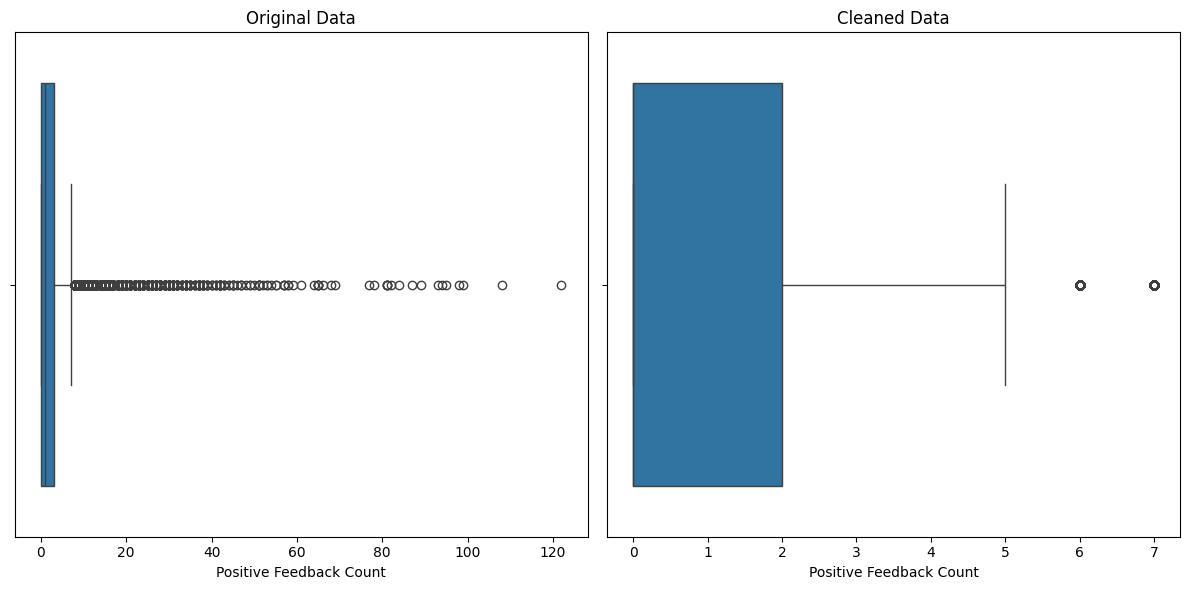

Original Shape: (19662, 11)
Cleaned Shape: (17779, 11)


In [22]:
# -----------------------------------------------------------
# 8. Outlier Removal Based on Positive Feedback Count
# -----------------------------------------------------------

# Calculating the quartiles and IQR for outlier detection
Q1 = review_df['Positive Feedback Count'].quantile(0.25)
Q3 = review_df['Positive Feedback Count'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers
df_cleaned = review_df[(review_df['Positive Feedback Count'] >= lower_bound) & (review_df['Positive Feedback Count'] <= upper_bound)]

# Plotting boxplots before and after cleaning
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 2, 1)
sns.boxplot(x=review_df['Positive Feedback Count'])
plt.title('Original Data')

# Cleaned Data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['Positive Feedback Count'])
plt.title('Cleaned Data')

plt.tight_layout()
plt.show()

# Printing shapes before and after outlier removal
print(f"Original Shape: {review_df.shape}")
print(f"Cleaned Shape: {df_cleaned.shape}")

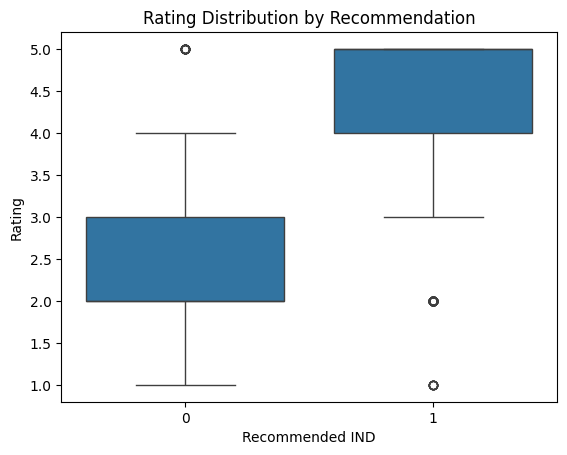

In [23]:
# -----------------------------------------------------------
# 9. Box Plot: Rating vs Recommended IND
# -----------------------------------------------------------
sns.boxplot(x='Recommended IND', y='Rating', data=review_df)
plt.title("Rating Distribution by Recommendation")
plt.show()

In [24]:
# -----------------------------------------------------------
# 10. Text Preprocessing: Removing Noise and Stopwords
# -----------------------------------------------------------
stop = set(stopwords.words('english'))

# Basic text cleaning function
def remove_noise(text):
    # Make all text lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    # Remove extra whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    # Remove non-printable characters
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '', regex=True)
    # Remove numbers
    text = text.str.replace('\d+', '', regex=True)
    # Remove Stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    # Convert column to string type
    text = text.astype(str)
    return text

# Applying noise removal function to our 'Text' column
review_df['Filtered Review Text'] = remove_noise(review_df['Text'])
review_df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text,Text_Length,Filtered Review Text
0,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,524,major design flaws high hopes dress really wan...
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",141,favorite buy love love love jumpsuit fun flirt...
2,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,209,flattering shirt shirt flattering due adjustab...
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...,512,petite love tracy reese dresses one petite fee...
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...,517,cagrcoal shimmer fun aded basket hte last mint...


In [25]:
# -----------------------------------------------------------
# 11. Lemmatization and Further Preprocessing using NLTK
# -----------------------------------------------------------

# Instantiate the tokenizer and lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Helper function to map POS tags to WordNet POS for accurate lemmatization
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Define a function for lemmatizing text
def lemmatize_text(text):
    # Tokenize the text
    tokens = w_tokenizer.tokenize(text)
    # Lemmatize and keep only alphabetic words
    cleaned_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens if word.isalpha()]
    return cleaned_tokens

# Apply lemmatization to the 'Filtered Review Text'
review_df['Filtered Review Text'] = review_df['Filtered Review Text'].apply(lemmatize_text)
review_df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text,Text_Length,Filtered Review Text
0,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,524,"[major, design, flaw, high, hope, dress, reall..."
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",141,"[favorite, buy, love, love, love, jumpsuit, fu..."
2,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,209,"[flatter, shirt, shirt, flatter, due, adjustab..."
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...,512,"[petite, love, tracy, reese, dress, one, petit..."
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...,517,"[cagrcoal, shimmer, fun, aded, basket, hte, la..."


In [26]:
# -----------------------------------------------------------
# 12. Sentiment Analysis using TextBlob
# -----------------------------------------------------------
# Join lemmatized tokens back into a single string
review_df['Joined Filtered Review Text'] = review_df['Filtered Review Text'].apply(lambda tokens: ' '.join(tokens))

# Defining a sentiment analyser function to get polarity
def sentiment_analyser(text):
    return TextBlob(text).sentiment.polarity

# Applying sentiment analysis on 'Filtered Review Text'
review_df['Polarity'] = review_df['Joined Filtered Review Text'].apply(sentiment_analyser)

# Display the updated DataFrame
review_df.head(10)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text,Text_Length,Filtered Review Text,Joined Filtered Review Text,Polarity
0,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,524,"[major, design, flaw, high, hope, dress, reall...",major design flaw high hope dress really want ...,0.081439
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",141,"[favorite, buy, love, love, love, jumpsuit, fu...",favorite buy love love love jumpsuit fun flirt...,0.500000
2,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,209,"[flatter, shirt, shirt, flatter, due, adjustab...",flatter shirt shirt flatter due adjustable fro...,0.458333
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...,512,"[petite, love, tracy, reese, dress, one, petit...",petite love tracy reese dress one petite foot ...,0.106250
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...,517,"[cagrcoal, shimmer, fun, aded, basket, hte, la...",cagrcoal shimmer fun aded basket hte last mint...,0.120500
5,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,"Shimmer, surprisingly goes with lots I ordered...",519,"[shimmer, surprisingly, go, lot, order, carbon...",shimmer surprisingly go lot order carbon store...,0.202564
6,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Flattering I love this dress. i usually get an...,177,"[flatter, love, dress, usually, get, x, run, l...",flatter love dress usually get x run little sn...,-0.046875
7,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...",378,"[fun, dress, im, lb, order, petite, make, sure...",fun dress im lb order petite make sure length ...,0.199008
8,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,Dress looks like it's made of cheap material D...,381,"[dress, look, like, make, cheap, material, dre...",dress look like make cheap material dress run ...,0.027143
9,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,Perfect!!! More and more i find myself reliant...,513,"[perfect, find, reliant, review, write, savvy,...",perfect find reliant review write savvy shoppe...,0.283673


<ipython-input-27-5aa3f73f4efd>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




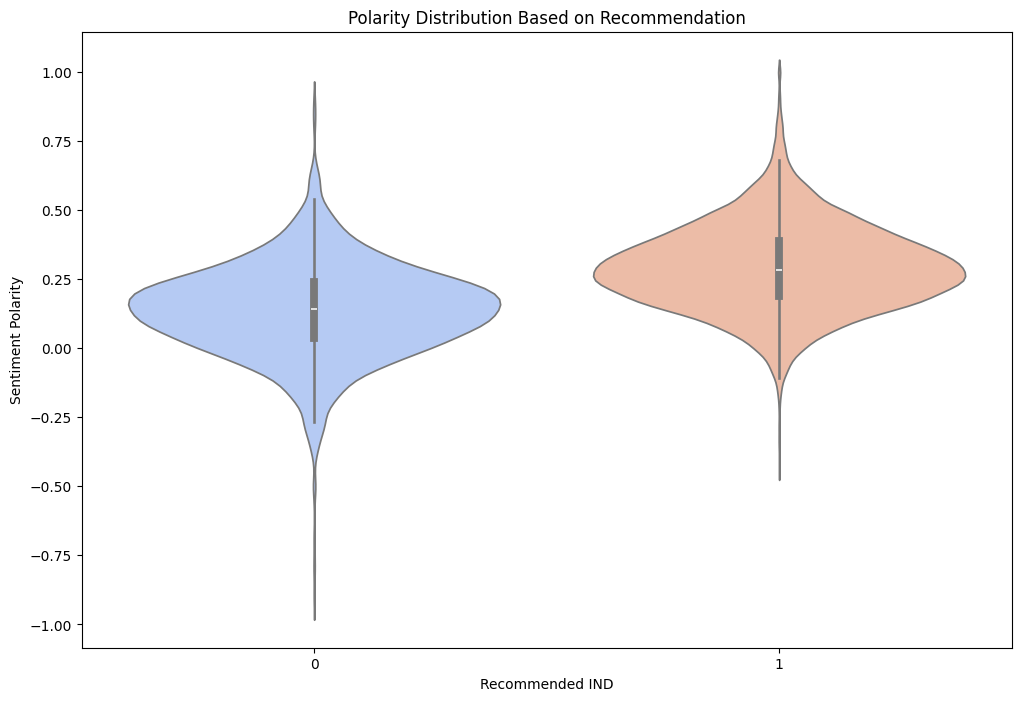

In [27]:
# -----------------------------------------------------------
# 13. Visualization: Polarity vs Recommended Indicator
# -----------------------------------------------------------
plt.figure(figsize=(12, 8))
sns.violinplot(x='Recommended IND', y='Polarity', data=review_df, palette='coolwarm')
plt.title("Polarity Distribution Based on Recommendation")
plt.xlabel("Recommended IND")
plt.ylabel("Sentiment Polarity")
plt.show()

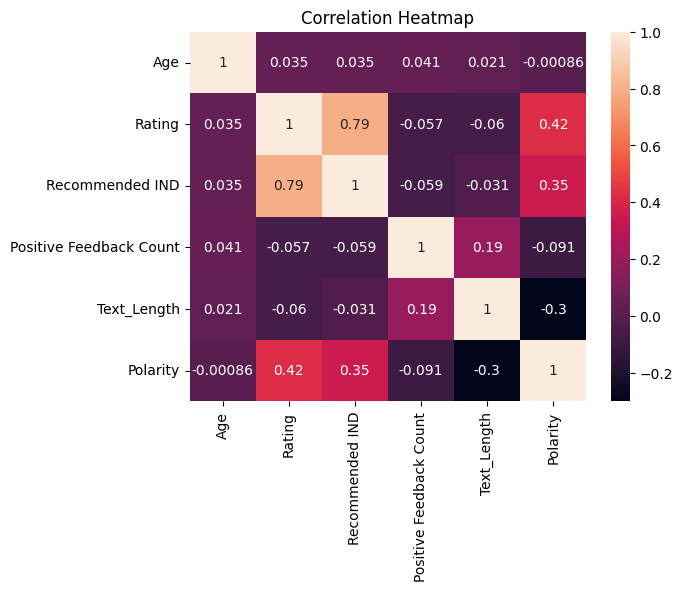

In [28]:
# -----------------------------------------------------------
# 14. Correlation Heatmap for Numeric Columns
# -----------------------------------------------------------
X = review_df
X_numeric = X.select_dtypes(include='number')  # Selecting numeric columns

# Plotting the correlation matrix as a heatmap
sns.heatmap(X_numeric.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [29]:
# -----------------------------------------------------------
# 15. TF-IDF Vectorization
# -----------------------------------------------------------
# Convert the tokenized lists back into strings
review_df['Filtered Review Text'] = review_df['Filtered Review Text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Initializing TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fitting and transforming the text data into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(review_df['Filtered Review Text'])

In [30]:
# -----------------------------------------------------------
# 16. Count Vectorization with N-grams (Unigrams & Bigrams)
# -----------------------------------------------------------
# Using CountVectorizer with ngrams
cvec = CountVectorizer(min_df=.005, max_df=.9, ngram_range=(1,2), tokenizer=lambda doc: lemmatize_text(doc))
cvec.fit(review_df['Filtered Review Text'])

# Checking the vocabulary size
len(cvec.vocabulary_)

# Creating the bag-of-words representation
cvec_counts = cvec.transform(review_df['Filtered Review Text'])
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



sparse matrix shape: (19662, 1109)
nonzero count: 533334
sparsity: 2.45%


In [31]:
# -----------------------------------------------------------
# 17. Applying TF-IDF Transformer on the Count Vectors
# -----------------------------------------------------------
transformer = TfidfTransformer()

# Fitting and transforming n-grams with TF-IDF
transformed_weights = transformer.fit_transform(cvec_counts)

# Converting TF-IDF matrix to a DataFrame
if isinstance(transformed_weights, np.ndarray):
    transformed_weights = transformed_weights
else:
    transformed_weights = transformed_weights.toarray()

vocab = cvec.get_feature_names_out()

model = pd.DataFrame(transformed_weights, columns=vocab)
model['Keyword'] = model.idxmax(axis=1)  # Identifying the keyword with max TF-IDF weight per row
model['Max'] = model.select_dtypes(include=[np.number]).max(axis=1)  # Maximum TF-IDF score
model['Sum'] = model.drop(['Max', 'Keyword'], axis=1).sum(axis=1)    # Sum of all TF-IDF scores in the row
model.head(100)

,able,absolutely,absolutely love,across,actually,add,addition,adorable,adore,afraid,...,yellow,yes,yesterday,yet,youre,zip,zipper,Keyword,Max,Sum
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.165663,0.144835,layer,0.371545,5.615320
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,love love,0.479606,3.745492
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,shirt,0.538276,3.545700
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,dress,0.331283,5.181067
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,pale,0.271373,5.250785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,shape,0.427034,3.694830
96,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,make,0.338960,6.098412
97,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,vest,0.544537,3.288383
98,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,would definitely,0.286998,4.615500


In [32]:
# -----------------------------------------------------------
# 18. Merging TF-IDF data with Original DataFrame
# -----------------------------------------------------------
model = pd.merge(review_df, model, left_index=True, right_index=True)
model.head(10)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text,...,yellow,yes,yesterday,yet,youre,zip,zipper,Keyword,Max,Sum
0,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,...,0.0,0.0,0.0,0.0,0.000000,0.165663,0.144835,layer,0.371545,5.615320
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,love love,0.479606,3.745492
2,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,shirt,0.538276,3.545700
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,dress,0.331283,5.181067
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,pale,0.271373,5.250785
5,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,"Shimmer, surprisingly goes with lots I ordered...",...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,go,0.358661,5.927142
6,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Flattering I love this dress. i usually get an...,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,flatter love,0.351486,4.263415
7,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...",...,0.0,0.0,0.0,0.0,0.170907,0.000000,0.000000,petite,0.230293,6.212161
8,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,Dress looks like it's made of cheap material D...,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.197446,cheap,0.403703,5.191765
9,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,Perfect!!! More and more i find myself reliant...,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,line,0.336155,4.771006


In [33]:
# -----------------------------------------------------------
# 19. Most Frequent Terms and Highest Weighted Terms
# -----------------------------------------------------------
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Occurrences': occ})
counts_df.sort_values(by='Occurrences', ascending=False).head(25)  # Top 25 most occurring terms

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Weight': weights})
weights_df.sort_values(by='Weight', ascending=False).head(25)  # Top 25 weighted terms by TF-IDF


,Term,Weight
225,dress,0.054639
538,love,0.044789
967,top,0.040570
310,fit,0.040512
824,size,0.039597
522,look,0.036222
380,great,0.036047
140,color,0.032405
1043,wear,0.032357
500,like,0.031436


In [34]:
# -----------------------------------------------------------
# 20. Additional Preprocessing for Visualization (WordCloud)
# -----------------------------------------------------------
# Convert a list of sentences into one single lowercased string
def get_all_str(sentences):
    sentence = ''
    for words in sentences:
        sentence += words
    sentence = sentence.lower()
    return sentence

# Convert a list of words into a single lowercased string separated by spaces
def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char + ' '
    sentence = sentence.lower()
    return sentence

# Extract words from text using a regex tokenizer
def get_word(text):
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

# Remove stopwords from a list of words
def remove_stopword(lst):
    stoplist = stopwords.words('english')
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist]
    return cleanwordlist

# Lemmatize a list of words
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

# Create a frequency DataFrame from a list of words
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'], ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# Generate and display a word cloud from frequency data
def Word_Cloud(review_df, color_background, colormap, title, mask):
    plt.figure(figsize=(20,15))
    wc = WordCloud(
        width=800,
        height=400,
        max_words=340,
        mask=mask,
        colormap=colormap,
        max_font_size=200,
        min_font_size=1,
        random_state=8888,
        background_color=color_background
    ).generate_from_frequencies(review_df)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Preprocess text column for frequency distribution
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    frequency_df = Freq_df(lemmatize)
    return frequency_df

# Create a word cloud from a given text column
def create_wordcloud(column, title, color, mask):
    frequency_df = preprocess(column)
    review_df_wc = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(review_df_wc, 'white', color, title, mask)

In [35]:
# Using an image from the web as a mask for the word cloud
url = 'https://media.istockphoto.com/photos/woman-purple-dress-fashion-model-in-long-fluttering-gown-back-rear-picture-id1090972948?k=20&m=1090972948&s=612x612&w=0&h=56SBD2hFG03zOvfRaNOI_jLpsLuXQXjRmL7LOOo38Sw='
mask = np.array(Image.open(requests.get(url, stream=True).raw))

In [36]:
# Top 10 frequent words
top10_frequent = preprocess(review_df['Text'])[:10]
top10_frequent

,Term,Frequency
0,dress,11782
1,fit,9797
2,love,9332
3,size,8672
4,top,8593
5,great,6731
6,color,6658
7,like,6630
8,look,6356
9,wear,5908


In [37]:
# -----------------------------------------------------------
# 21. Visualizing Top 10 Frequent Terms (Bar Plot)
# -----------------------------------------------------------
fig = px.bar(
    top10_frequent,
    x='Term', y='Frequency',
    text='Frequency',
    color_discrete_sequence=px.colors.sequential.RdBu,
    title='1. Top 10 frequent terms (bar plot)',
    color='Term', template="simple_white"
)
fig.update_layout(font=dict(size=17, family='Franklin Gothic'))
fig.show()

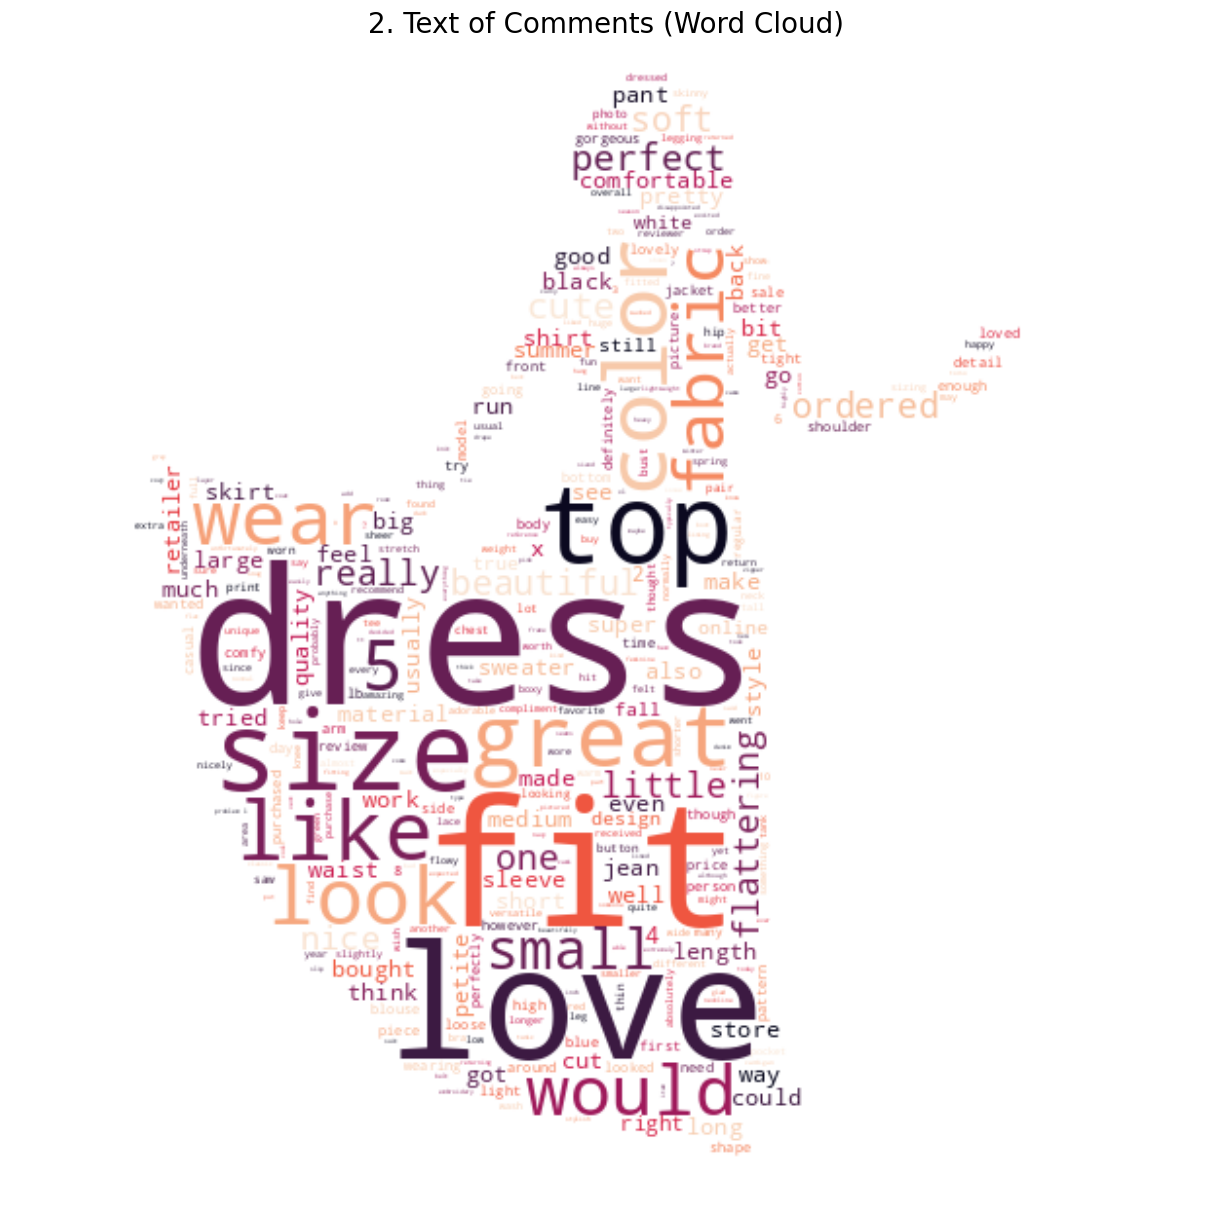

In [38]:
# -----------------------------------------------------------
# 22. Word Cloud of All Comments
# -----------------------------------------------------------
create_wordcloud(review_df['Text'], '2. Text of Comments (Word Cloud)', 'rocket', mask)

# Extract only adjectives from tagged words
def pos_adjective(tagged):
    only_adjective = [word for word, pos in tagged if pos in ['JJ', 'JJR', 'JJS']]
    stopwords_adj = ['top']
    txt = ''
    for i in range(len(only_adjective)):
        txt += only_adjective[i]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stopwords_adj]
    return cleanwordlist

# Preprocess text column and extract adjectives
def preprocess_adj(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize_words = lemmatization(after_removing)
    tagged = nltk.pos_tag(lemmatize_words)  # POS tagging the lemmatized words
    postag = pos_adjective(tagged)
    frequency_df = Freq_df(postag)
    return frequency_df

# Create a word cloud for adjectives extracted from text
def create_adj_wordcloud(column, title, color, mask):
    frequency_df = preprocess_adj(column)
    review_df_wc = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(review_df_wc, 'white', color, title, mask)


In [39]:
# Subset of recommended products
recommended = review_df[review_df['Recommended IND'] == 1]

In [40]:
# Subset of not recommended products
recommended_n = review_df[review_df['Recommended IND'] == 0]

In [41]:
# Preprocessing adjectives from non-recommended products
n_df = preprocess_adj(recommended_n['Text'])

In [42]:
# -----------------------------------------------------------
# 23. Bar Plot: Frequent Adjectives in Unrecommended Products
# -----------------------------------------------------------

fig = px.bar(
    x=n_df[20:29].Term, y=n_df[20:29].Frequency,
    color=n_df[20:29].Term,
    text=n_df[20:29].Frequency,
    color_discrete_sequence=px.colors.sequential.RdBu,
    title='Top 20~29 Comments of Unrecommended Products (Bar Plot)',
    template='simple_white'
)

idx = [0, 1, 8]
for index in idx:
    # This line references fig2, but fig2 is defined previously. Code left unchanged as requested.
    fig2.data[index].marker.line.width = 4
    fig2.data[index].marker.line.color = "black"

fig.update_layout(
    xaxis_title="Top 20~29 Unrecommended Comments",
    yaxis_title="count",
    font=dict(size=17, family='Franklin Gothic')
)
fig.show()


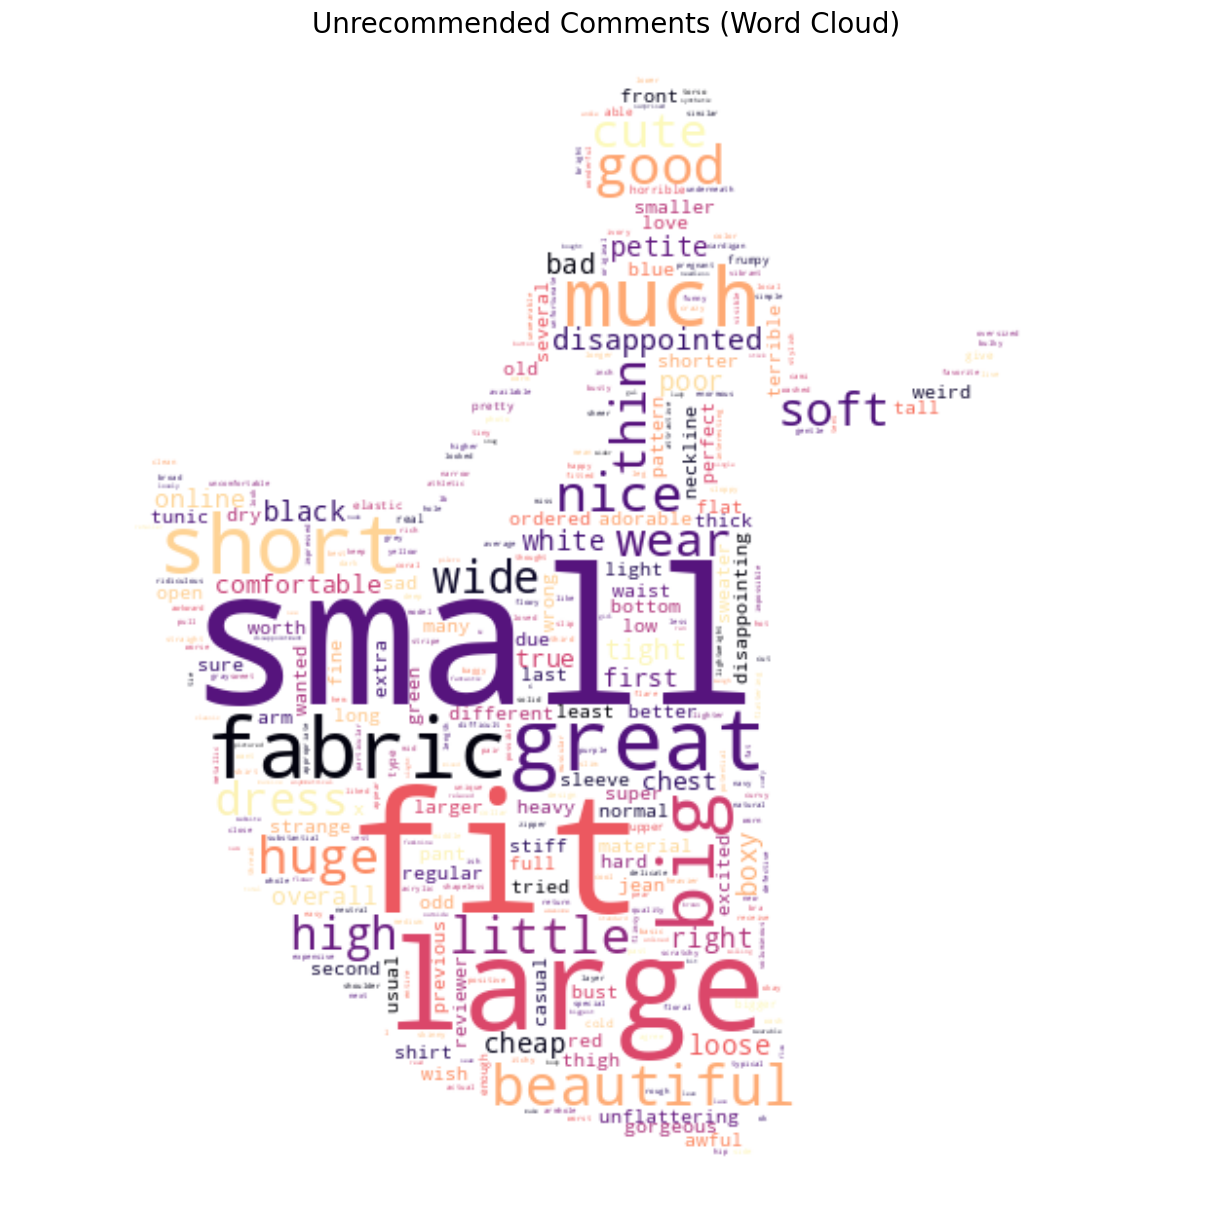

In [43]:
# -----------------------------------------------------------
# 24. Word Cloud of Unrecommended Products' Adjectives
# -----------------------------------------------------------
create_adj_wordcloud(recommended_n['Text'], 'Unrecommended Comments (Word Cloud)', 'magma', mask)

In [44]:
# Preprocessing adjectives from recommended products
y_df = preprocess_adj(recommended['Text'])

In [45]:
# -----------------------------------------------------------
# 25. Bar Plot: Frequent Adjectives in Recommended Products
# -----------------------------------------------------------
fig = px.bar(
    x=y_df[:10].Term, y=y_df[:10].Frequency,
    color=y_df[:10].Term,
    text=y_df[:10].Frequency,
    color_discrete_sequence=px.colors.sequential.RdBu_r,
    title='1. Top 10 Comments of Recommended Products (Bar Plot)',
    template='simple_white'
)

idx = [0, 4, 6, 7, 8]
for index in idx:
    # Emphasizing certain bars
    fig.data[index].marker.line.width = 4
    fig.data[index].marker.line.color = 'black'

fig.update_layout(
    xaxis_title="Top 10 Recommended Comments",
    yaxis_title="count",
    font=dict(size=17, family='Franklin Gothic')
)
fig.show()

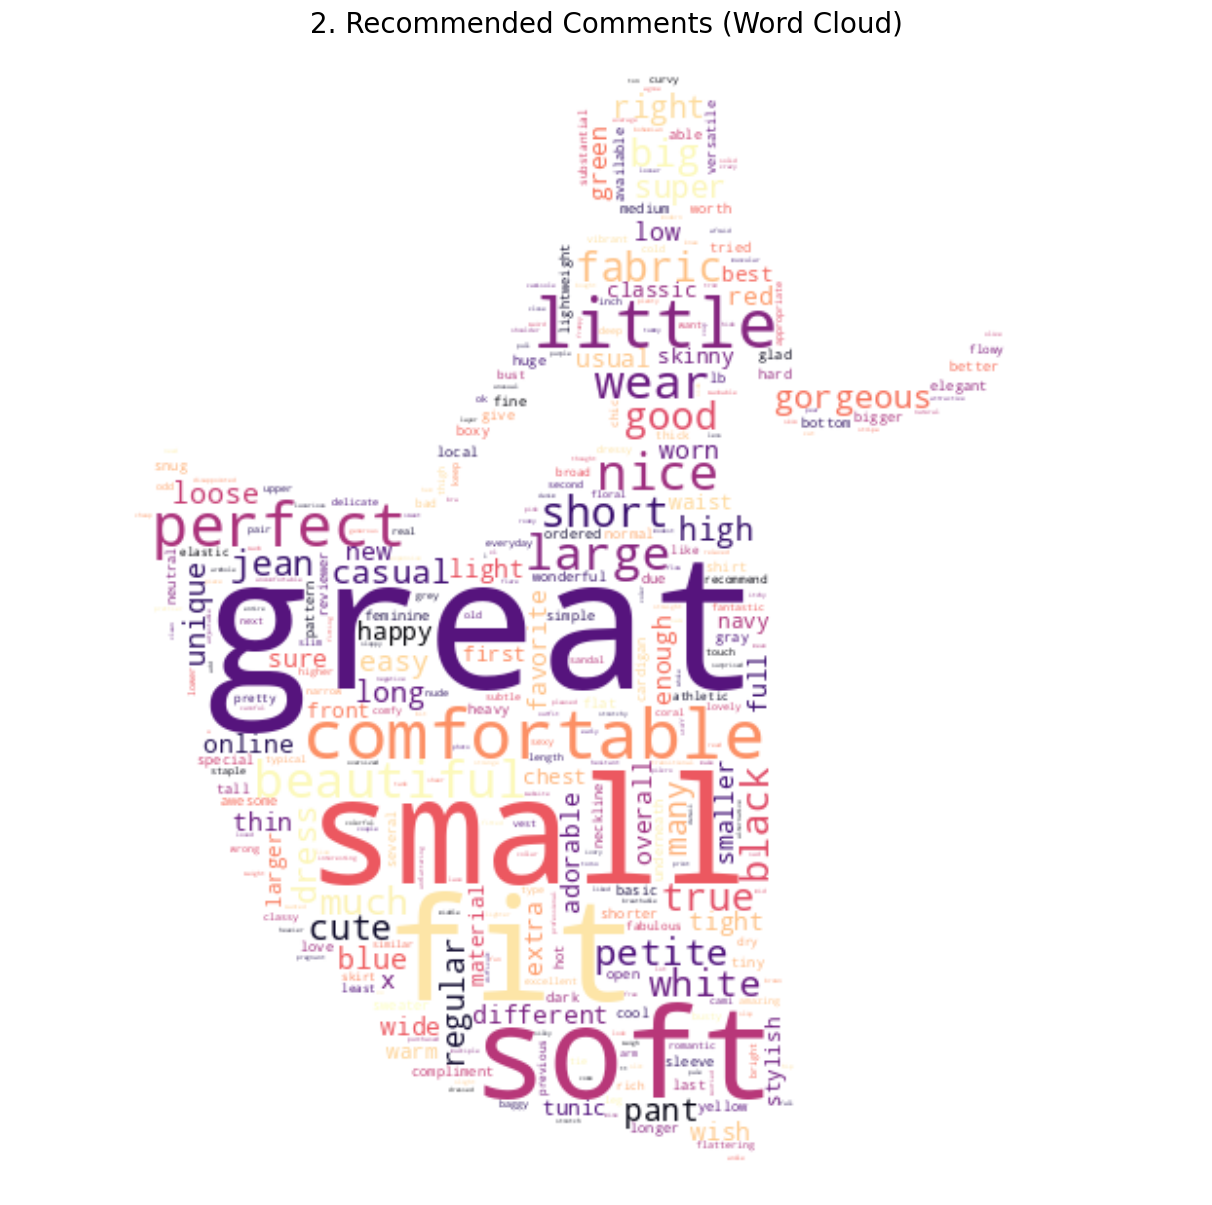

In [46]:
# -----------------------------------------------------------
# 26. Word Cloud of Recommended Products' Adjectives
# -----------------------------------------------------------
create_adj_wordcloud(recommended['Text'], '2. Recommended Comments (Word Cloud)', 'magma', mask)

<ipython-input-47-f43069e493fc>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




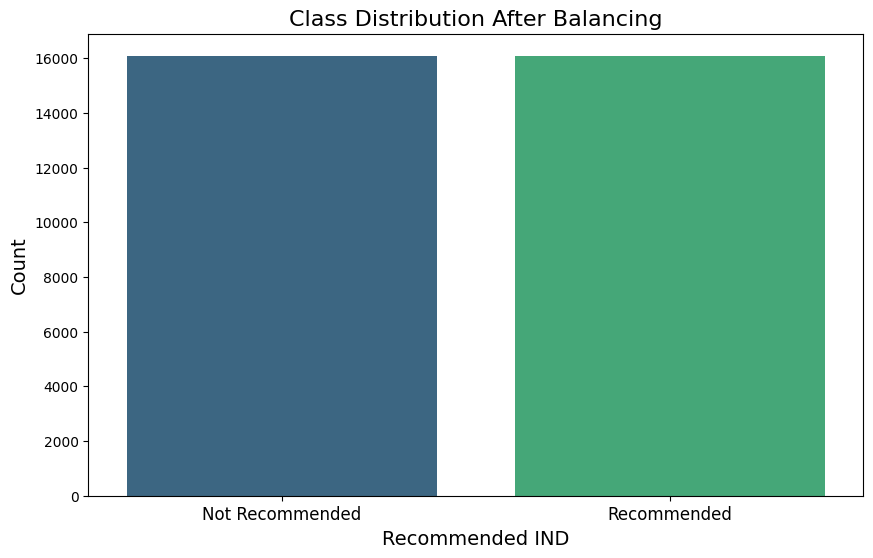

In [47]:
from sklearn.utils import resample
# -----------------------------------------------------------
# 27. Oversampling
# -----------------------------------------------------------
# Oversampling the minority class to balance the dataset
recommended_df = review_df[review_df['Recommended IND'] == 1]
not_recommended_df = review_df[review_df['Recommended IND'] == 0]

# Oversample the minority class
not_recommended_oversampled = resample(
    not_recommended_df,
    replace=True,  # Allow resampling of the same rows
    n_samples=len(recommended_df),  # Match the majority class count
    random_state=42  # Ensure reproducibility
)

# Combine the oversampled data with the majority class
balanced_df = pd.concat([recommended_df, not_recommended_oversampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Count the number of samples in each class after balancing
balanced_class_counts = balanced_df['Recommended IND'].value_counts()

# Display the class distribution after balancing
plt.figure(figsize=(10, 6))
sns.barplot(x=balanced_class_counts.index, y=balanced_class_counts.values, palette="viridis")
plt.title('Class Distribution After Balancing', fontsize=16)
plt.xlabel('Recommended IND', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Recommended', 'Recommended'], fontsize=12)
plt.show()

Q2

In [48]:
# ---------------------------------
# 1. TF-IDF Vectorization
# ---------------------------------
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
X_tfidf = tfidf_vectorizer.fit_transform(balanced_df['Filtered Review Text'])


In [49]:
# ---------------------------------
# 2. Count Vectorization (for RF and XGB)
# ---------------------------------
# Initialize Count Vectorizer with custom tokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)

# Fit and transform the cleaned text
X_count = count_vectorizer.fit_transform(balanced_df['Filtered Review Text'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [50]:
# ---------------------------------
# 3. Combine TF-IDF and Count with Numerical Features
# ---------------------------------
# Extract numerical features and standardize them
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(balanced_df[['Age', 'Rating', 'Positive Feedback Count', 'Polarity']])

# Combine TF-IDF features (sparse) with numerical features (dense)
X_tfidf_combined = hstack([X_tfidf, X_features_scaled])

# Combine Count Vectorizer features (sparse) with numerical features (dense)
X_count_combined = hstack([X_count, X_features_scaled])

# Set target variable
target = 'Recommended IND'
y = balanced_df[target].astype(int)


In [51]:
# Check the shape of the combined datasets
print("\nShape of Combined Features (TF-IDF):", X_tfidf_combined.shape)
print("Shape of Combined Features (Count Vectorizer):", X_count_combined.shape)
print("Shape of Target Variable:", y.shape)

# Check some sample rows of the cleaned dataset
print("\nSample Rows from Cleaned Dataset:")
print(balanced_df[['Text', 'Filtered Review Text', 'Polarity', 'Recommended IND']].head())


Shape of Combined Features (TF-IDF): (32174, 5004)
Shape of Combined Features (Count Vectorizer): (32174, 15088)
Shape of Target Variable: (32174,)

Sample Rows from Cleaned Dataset:
                                                Text  \
0  Good support I am not a fan of unlined bras, b...   
1  Surprisingly cute! When i first saw this i tho...   
2  Great top! One of the best tops i have ever bo...   
3  Great shape This romper has a great shape! you...   
4  First lars miss... I love every other byron la...   

                                Filtered Review Text  Polarity  \
0  good support fan unlined bra one pretty try la...  0.337500   
1  surprisingly cute first saw thought bit boxy d...  0.217092   
2  great top one best top ever bought love materi...  0.533333   
3  great shape romper great shape know long saggy...  0.328571   
4  first lars miss love every byron lars dress iv... -0.028571   

   Recommended IND  
0                1  
1                1  
2                1 

In [52]:
# ---------------------------------
# 4. Split Data for Model Training
# ---------------------------------
X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf_combined, y, test_size=0.2, random_state=42
)
X_count_train, X_count_test, y_train_count, y_test_count = train_test_split(
    X_count_combined, y, test_size=0.2, random_state=42
)

In [53]:
# Random Forest with Count Vectorizer
rf_model = RandomForestClassifier(random_state=42)
print("Training and Evaluating Random Forest (Count Vectorizer)...")

# Fit the model on training data
rf_model.fit(X_count_train, y_train_count)

# Predict on test set
rf_y_pred = rf_model.predict(X_count_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test_count, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test_count, rf_y_pred)
rf_report = classification_report(y_test_count, rf_y_pred)

print(f"Random Forest (Count Vectorizer) Test Accuracy: {rf_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(rf_report)
print("=" * 50)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_count_train, y_train_count, cv=5, scoring='accuracy')
print(f"Random Forest (Count Vectorizer) Cross-Validation Accuracy: {rf_cv_scores.mean() * 100:.2f}% ± {rf_cv_scores.std() * 100:.2f}%")
print("=" * 50)


Training and Evaluating Random Forest (Count Vectorizer)...
Random Forest (Count Vectorizer) Test Accuracy: 97.84%
Confusion Matrix:
[[3194   14]
 [ 125 3102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3208
           1       1.00      0.96      0.98      3227

    accuracy                           0.98      6435
   macro avg       0.98      0.98      0.98      6435
weighted avg       0.98      0.98      0.98      6435

Random Forest (Count Vectorizer) Cross-Validation Accuracy: 97.33% ± 0.27%


In [54]:
# Logistic Regression with TF-IDF
lr_model = LogisticRegression(random_state=42, max_iter=1000)
print("Training and Evaluating Logistic Regression (TF-IDF)...")

# Fit the model on training data
lr_model.fit(X_tfidf_train, y_train_tfidf)

# Predict on test set
lr_y_pred = lr_model.predict(X_tfidf_test)

# Evaluate performance
lr_accuracy = accuracy_score(y_test_tfidf, lr_y_pred)
lr_conf_matrix = confusion_matrix(y_test_tfidf, lr_y_pred)
lr_report = classification_report(y_test_tfidf, lr_y_pred)

print(f"Logistic Regression (TF-IDF) Test Accuracy: {lr_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(lr_conf_matrix)
print("\nClassification Report:")
print(lr_report)
print("=" * 50)

# Perform cross-validation
lr_cv_scores = cross_val_score(lr_model, X_tfidf_train, y_train_tfidf, cv=5, scoring='accuracy')
print(f"Logistic Regression (TF-IDF) Cross-Validation Accuracy: {lr_cv_scores.mean() * 100:.2f}% ± {lr_cv_scores.std() * 100:.2f}%")
print("=" * 50)


Training and Evaluating Logistic Regression (TF-IDF)...
Logistic Regression (TF-IDF) Test Accuracy: 95.45%
Confusion Matrix:
[[3104  104]
 [ 189 3038]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3208
           1       0.97      0.94      0.95      3227

    accuracy                           0.95      6435
   macro avg       0.95      0.95      0.95      6435
weighted avg       0.95      0.95      0.95      6435

Logistic Regression (TF-IDF) Cross-Validation Accuracy: 94.82% ± 0.30%


In [55]:
# Support Vector Machine (SVM) with TF-IDF
svm_model = SVC(kernel='linear', random_state=42)
print("Training and Evaluating SVM (TF-IDF)...")

# Fit the model on training data
svm_model.fit(X_tfidf_train, y_train_tfidf)

# Predict on test set
svm_y_pred = svm_model.predict(X_tfidf_test)

# Evaluate performance
svm_accuracy = accuracy_score(y_test_tfidf, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test_tfidf, svm_y_pred)
svm_report = classification_report(y_test_tfidf, svm_y_pred)

print(f"SVM (TF-IDF) Test Accuracy: {svm_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(svm_conf_matrix)
print("\nClassification Report:")
print(svm_report)
print("=" * 50)

# Perform cross-validation
svm_cv_scores = cross_val_score(svm_model, X_tfidf_train, y_train_tfidf, cv=5, scoring='accuracy')
print(f"SVM (TF-IDF) Cross-Validation Accuracy: {svm_cv_scores.mean() * 100:.2f}% ± {svm_cv_scores.std() * 100:.2f}%")
print("=" * 50)


Training and Evaluating SVM (TF-IDF)...
SVM (TF-IDF) Test Accuracy: 96.15%
Confusion Matrix:
[[3145   63]
 [ 185 3042]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3208
           1       0.98      0.94      0.96      3227

    accuracy                           0.96      6435
   macro avg       0.96      0.96      0.96      6435
weighted avg       0.96      0.96      0.96      6435

SVM (TF-IDF) Cross-Validation Accuracy: 95.55% ± 0.31%


In [56]:
# XGBoost with Count Vectorizer
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
print("Training and Evaluating XGBoost (Count Vectorizer)...")

# Fit the model on training data
xgb_model.fit(X_count_train, y_train_count)

# Predict on test set
xgb_y_pred = xgb_model.predict(X_count_test)

# Evaluate performance
xgb_accuracy = accuracy_score(y_test_count, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test_count, xgb_y_pred)
xgb_report = classification_report(y_test_count, xgb_y_pred)

print(f"XGBoost (Count Vectorizer) Test Accuracy: {xgb_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(xgb_conf_matrix)
print("\nClassification Report:")
print(xgb_report)
print("=" * 50)

# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_count_train, y_train_count, cv=5, scoring='accuracy')
print(f"XGBoost (Count Vectorizer) Cross-Validation Accuracy: {xgb_cv_scores.mean() * 100:.2f}% ± {xgb_cv_scores.std() * 100:.2f}%")
print("=" * 50)


Training and Evaluating XGBoost (Count Vectorizer)...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:47:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost (Count Vectorizer) Test Accuracy: 97.08%
Confusion Matrix:
[[3182   26]
 [ 162 3065]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3208
           1       0.99      0.95      0.97      3227

    accuracy                           0.97      6435
   macro avg       0.97      0.97      0.97      6435
weighted avg       0.97      0.97      0.97      6435



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost (Count Vectorizer) Cross-Validation Accuracy: 96.17% ± 0.41%


Q3

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', verbose=2)
rf_grid_search.fit(X_count_train, y_train_count)

print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best accuracy: {rf_grid_search.best_score_:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  21.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  22.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  21.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  21.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  44.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  43.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  42.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  42.6s
[CV] END m

In [ ]:
# Define the parameter grid
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lr_param_grid, cv=5, scoring='accuracy', verbose=2)
lr_grid_search.fit(X_tfidf_train, y_train_tfidf)

print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")
print(f"Best accuracy: {lr_grid_search.best_score_:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.1s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.1s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.1s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solv

In [ ]:
# Define the parameter grid
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='accuracy', verbose=2)
svm_grid_search.fit(X_tfidf_train, y_train_tfidf)

print(f"Best parameters for SVM: {svm_grid_search.best_params_}")
print(f"Best accuracy: {svm_grid_search.best_score_:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..............................C=0.01, kernel=linear; total time=  25.5s
[CV] END ..............................C=0.01, kernel=linear; total time=  25.2s
[CV] END ..............................C=0.01, kernel=linear; total time=  25.2s
[CV] END ..............................C=0.01, kernel=linear; total time=  25.2s
[CV] END ..............................C=0.01, kernel=linear; total time=  25.3s
[CV] END .................................C=0.01, kernel=rbf; total time=  44.8s
[CV] END .................................C=0.01, kernel=rbf; total time=  44.1s
[CV] END .................................C=0.01, kernel=rbf; total time=  43.8s
[CV] END .................................C=0.01, kernel=rbf; total time=  43.7s
[CV] END .................................C=0.01, kernel=rbf; total time=  43.8s
[CV] END ...............................C=0.1, kernel=linear; total time=  21.1s
[CV] END ...............................C=0.1, k

In [ ]:
from xgboost import XGBClassifier

# Define the parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_param_grid, cv=5, scoring='accuracy', verbose=2)
xgb_grid_search.fit(X_count_train, y_train_count)

print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best accuracy: {xgb_grid_search.best_score_:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:55:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:56:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:57:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:58:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:58:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:58:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:58:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:58:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:58:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:59:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:59:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:59:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:59:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:59:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:59:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:00:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:00:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:00:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:00:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:01:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:01:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:01:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:01:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  20.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:01:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  19.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:02:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:02:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  18.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:02:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  18.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:03:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  21.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:03:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:03:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  19.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:04:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  22.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:04:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  19.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:04:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  28.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:05:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  28.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:05:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:06:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  29.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:06:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  28.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:07:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  29.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:07:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  31.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:08:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  32.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:08:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  29.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  29.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:09:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:10:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:11:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:12:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:13:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:13:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:13:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:13:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:13:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:13:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:14:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:14:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:14:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:14:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:15:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:15:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:15:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:15:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:15:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:16:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:16:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:16:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:16:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  14.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:17:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  14.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:17:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:17:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:17:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:17:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:18:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:19:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:21:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:22:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   9.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:22:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:22:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:22:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:22:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   9.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:22:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:23:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:23:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:23:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  12.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:23:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:23:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:23:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:24:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:24:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  12.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:24:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:24:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:24:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  12.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:25:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:26:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:27:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:27:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:27:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:27:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:27:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:27:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:27:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:28:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:28:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:28:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:28:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:28:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:28:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:29:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:29:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:29:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:29:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:29:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:29:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:30:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:30:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:30:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:30:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:30:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:30:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:31:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:31:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:31:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:31:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  19.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:31:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  20.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:32:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  21.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:32:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  20.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:32:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  18.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:33:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:33:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:33:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:34:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  20.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  22.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:34:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  29.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:35:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  30.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:35:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  33.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  30.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:37:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=  29.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:37:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  32.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:38:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  31.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:38:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  35.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  32.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:39:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=  31.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:40:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:41:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:42:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:43:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:43:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:43:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:44:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:44:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:44:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:44:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:44:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:44:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:44:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  12.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  12.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:45:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  12.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:45:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:45:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:45:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:46:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:46:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:46:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:46:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  17.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:46:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  18.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:47:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  15.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:47:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:47:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:48:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  14.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:48:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  17.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:48:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  14.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:48:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=  14.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:49:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:51:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:52:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:53:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:53:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:53:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:53:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:53:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:53:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:54:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:54:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:54:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:54:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:54:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:54:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:55:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  14.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:55:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  13.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:55:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:55:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=  14.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:56:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:56:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:56:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:56:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:57:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8}
Best accuracy: 0.97


In [57]:
# Retrain the best Random Forest model
best_rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
best_rf_model.fit(X_count_train, y_train_count)

# Predict on test set
rf_y_pred = best_rf_model.predict(X_count_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test_count, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test_count, rf_y_pred)
rf_report = classification_report(y_test_count, rf_y_pred)

print(f"Random Forest (Best) Test Accuracy: {rf_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(rf_report)


Random Forest (Best) Test Accuracy: 97.90%
Confusion Matrix:
[[3194   14]
 [ 121 3106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3208
           1       1.00      0.96      0.98      3227

    accuracy                           0.98      6435
   macro avg       0.98      0.98      0.98      6435
weighted avg       0.98      0.98      0.98      6435



In [58]:
# Retrain the best Logistic Regression model
best_lr_model = LogisticRegression(C=100, solver='liblinear')
best_lr_model.fit(X_tfidf_train, y_train_tfidf)

# Predict on test set
lr_y_pred = best_lr_model.predict(X_tfidf_test)

# Evaluate performance
lr_accuracy = accuracy_score(y_test_tfidf, lr_y_pred)
lr_conf_matrix = confusion_matrix(y_test_tfidf, lr_y_pred)
lr_report = classification_report(y_test_tfidf, lr_y_pred)

print(f"Logistic Regression (Best) Test Accuracy: {lr_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(lr_conf_matrix)
print("\nClassification Report:")
print(lr_report)


Logistic Regression (Best) Test Accuracy: 97.42%
Confusion Matrix:
[[3191   17]
 [ 149 3078]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3208
           1       0.99      0.95      0.97      3227

    accuracy                           0.97      6435
   macro avg       0.97      0.97      0.97      6435
weighted avg       0.98      0.97      0.97      6435



In [59]:
# Retrain the best SVM model
best_svm_model = SVC(C=100, kernel='rbf')
best_svm_model.fit(X_tfidf_train, y_train_tfidf)

# Predict on test set
svm_y_pred = best_svm_model.predict(X_tfidf_test)

# Evaluate performance
svm_accuracy = accuracy_score(y_test_tfidf, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test_tfidf, svm_y_pred)
svm_report = classification_report(y_test_tfidf, svm_y_pred)

print(f"SVM (Best) Test Accuracy: {svm_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(svm_conf_matrix)
print("\nClassification Report:")
print(svm_report)


SVM (Best) Test Accuracy: 97.93%
Confusion Matrix:
[[3192   16]
 [ 117 3110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3208
           1       0.99      0.96      0.98      3227

    accuracy                           0.98      6435
   macro avg       0.98      0.98      0.98      6435
weighted avg       0.98      0.98      0.98      6435



In [60]:
# Retrain the best XGBoost model
best_xgb_model = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.2,
    max_depth=10,
    n_estimators=300,
    subsample=0.8
)
best_xgb_model.fit(X_count_train, y_train_count)

# Predict on test set
xgb_y_pred = best_xgb_model.predict(X_count_test)

# Evaluate performance
xgb_accuracy = accuracy_score(y_test_count, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test_count, xgb_y_pred)
xgb_report = classification_report(y_test_count, xgb_y_pred)

print(f"XGBoost (Best) Test Accuracy: {xgb_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(xgb_conf_matrix)
print("\nClassification Report:")
print(xgb_report)


XGBoost (Best) Test Accuracy: 97.44%
Confusion Matrix:
[[3197   11]
 [ 154 3073]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3208
           1       1.00      0.95      0.97      3227

    accuracy                           0.97      6435
   macro avg       0.98      0.97      0.97      6435
weighted avg       0.98      0.97      0.97      6435



Q4

In [61]:
# Import required libraries for evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [62]:
# Function to evaluate model performance and collect metrics
def evaluate_random_forest(y_test, y_pred, model_name="Random Forest"):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
    }
    print(f"{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics

# Evaluate the best Random Forest model
rf_metrics = evaluate_random_forest(y_test_count, rf_y_pred)


Random Forest Evaluation Metrics:
Accuracy: 0.9790
Precision: 0.9796
Recall: 0.9790
F1 Score: 0.9790


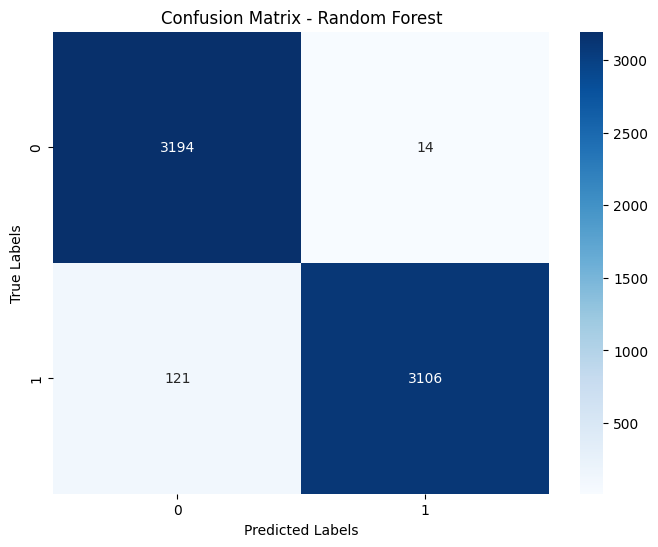

In [63]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name="Random Forest"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for Random Forest model
plot_confusion_matrix(y_test_count, rf_y_pred)


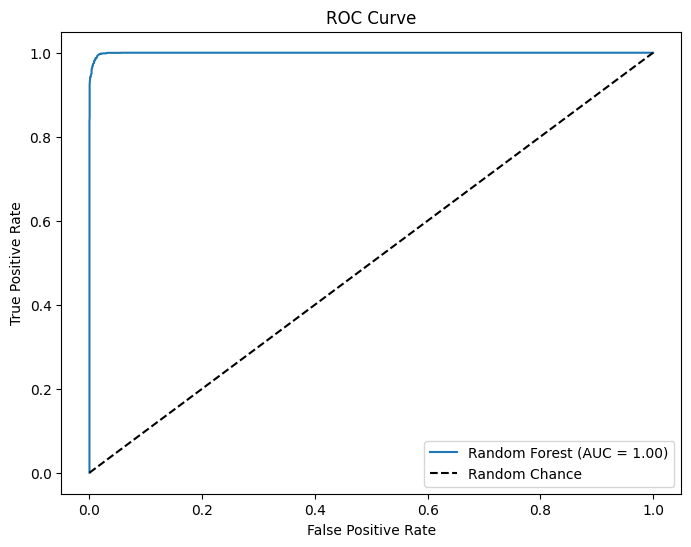

In [64]:
# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name="Random Forest"):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        raise ValueError("Model does not support probability prediction.")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Plot ROC Curve for Random Forest model
plot_roc_curve(best_rf_model, X_count_test, y_test_count)


In [65]:
# Print a detailed classification report
print("Classification Report for Random Forest Model:")
print(classification_report(y_test_count, rf_y_pred))


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3208
           1       1.00      0.96      0.98      3227

    accuracy                           0.98      6435
   macro avg       0.98      0.98      0.98      6435
weighted avg       0.98      0.98      0.98      6435



In [66]:
# Function to evaluate Logistic Regression performance and collect metrics
def evaluate_logistic_regression(y_test, y_pred, model_name="Logistic Regression"):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
    }
    print(f"{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics

# Evaluate the best Logistic Regression model
lr_metrics = evaluate_logistic_regression(y_test_tfidf, lr_y_pred)


Logistic Regression Evaluation Metrics:
Accuracy: 0.9742
Precision: 0.9750
Recall: 0.9742
F1 Score: 0.9742


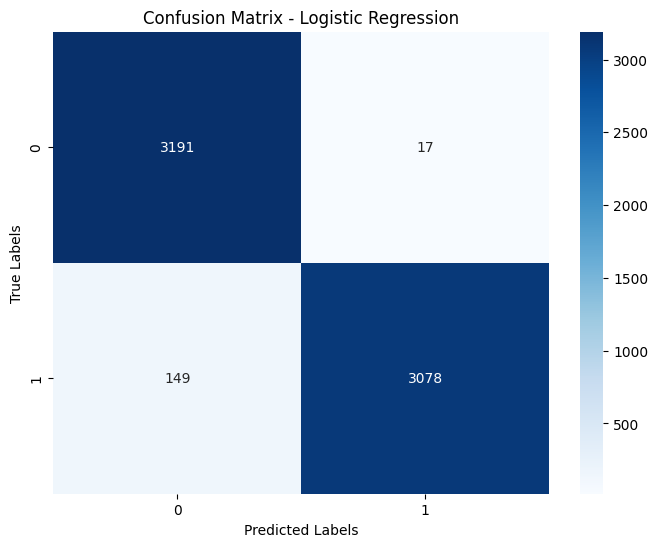

In [67]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name="Logistic Regression"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_lr_model.classes_, yticklabels=best_lr_model.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for Logistic Regression model
plot_confusion_matrix(y_test_tfidf, lr_y_pred)


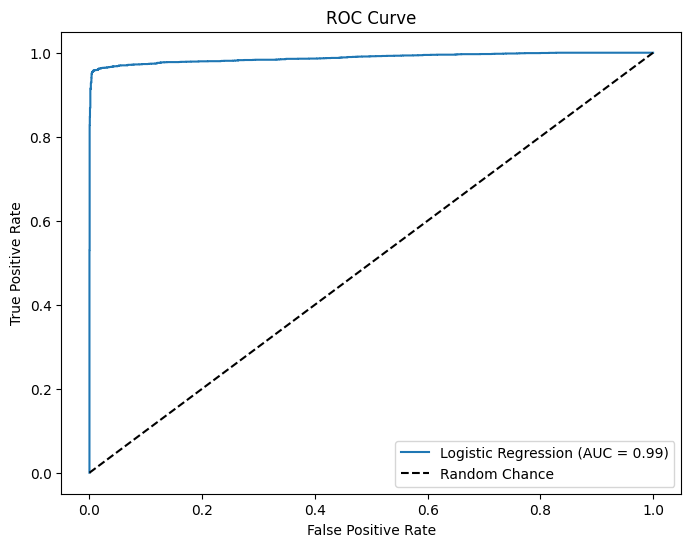

In [68]:
# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name="Logistic Regression"):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        raise ValueError("Model does not support probability prediction.")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Plot ROC Curve for Logistic Regression model
plot_roc_curve(best_lr_model, X_tfidf_test, y_test_tfidf)


In [69]:
# Print a detailed classification report
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_test_tfidf, lr_y_pred))


Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3208
           1       0.99      0.95      0.97      3227

    accuracy                           0.97      6435
   macro avg       0.97      0.97      0.97      6435
weighted avg       0.98      0.97      0.97      6435



In [70]:
# Function to evaluate SVM performance and collect metrics
def evaluate_svm(y_test, y_pred, model_name="SVM"):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
    }
    print(f"{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics

# Evaluate the best SVM model
svm_metrics = evaluate_svm(y_test_tfidf, svm_y_pred)


SVM Evaluation Metrics:
Accuracy: 0.9793
Precision: 0.9798
Recall: 0.9793
F1 Score: 0.9793


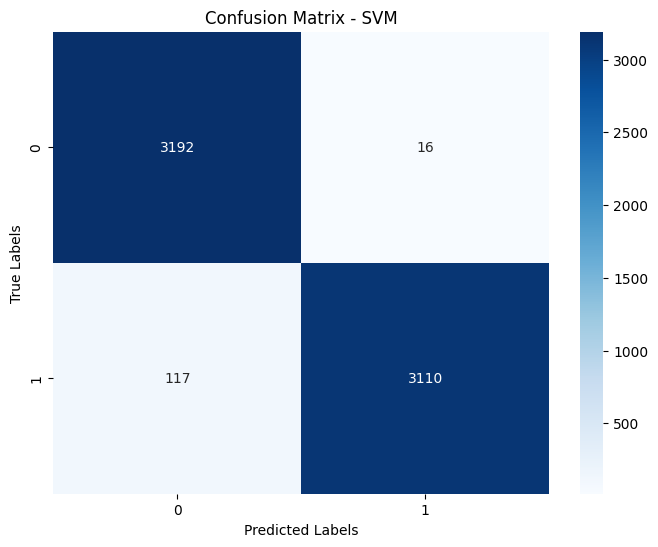

In [71]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name="SVM"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for SVM model
plot_confusion_matrix(y_test_tfidf, svm_y_pred)


In [72]:
# Plot ROC Curve for SVM model (if probability=True is enabled)
def plot_roc_curve(model, X_test, y_test, model_name="SVM"):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        raise ValueError("Model does not support probability prediction. Enable probability=True.")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Example: plot_roc_curve(best_svm_model, X_tfidf_test, y_test_tfidf)


In [73]:
# Print a detailed classification report
print("Classification Report for SVM Model:")
print(classification_report(y_test_tfidf, svm_y_pred))


Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3208
           1       0.99      0.96      0.98      3227

    accuracy                           0.98      6435
   macro avg       0.98      0.98      0.98      6435
weighted avg       0.98      0.98      0.98      6435



In [74]:
# Function to evaluate XGBoost performance and collect metrics
def evaluate_xgboost(y_test, y_pred, model_name="XGBoost"):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
    }
    print(f"{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics

# Evaluate the best XGBoost model
xgb_metrics = evaluate_xgboost(y_test_count, xgb_y_pred)


XGBoost Evaluation Metrics:
Accuracy: 0.9744
Precision: 0.9753
Recall: 0.9744
F1 Score: 0.9743


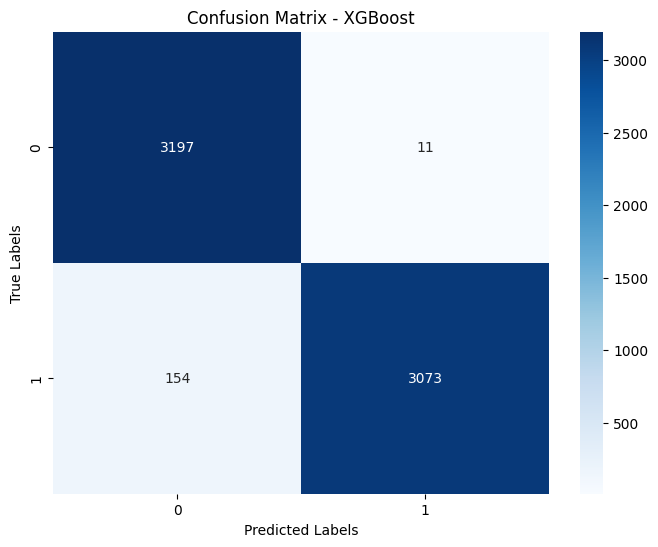

In [75]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name="XGBoost"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_xgb_model.classes_, yticklabels=best_xgb_model.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for XGBoost model
plot_confusion_matrix(y_test_count, xgb_y_pred)


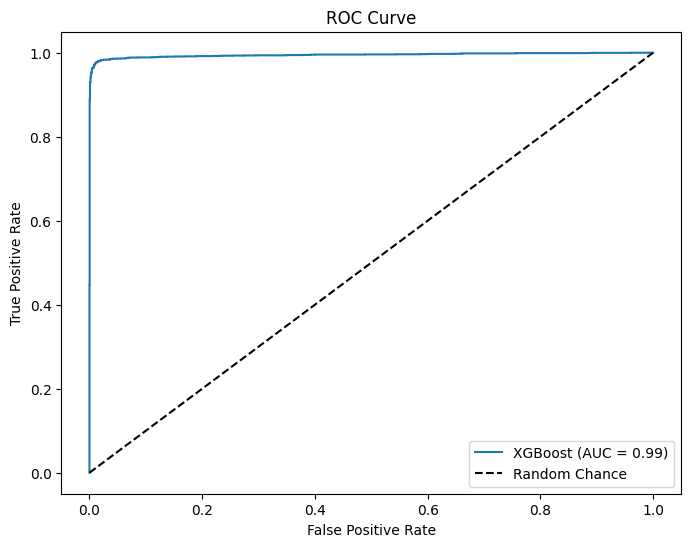

In [76]:
# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name="XGBoost"):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        raise ValueError("Model does not support probability prediction.")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Plot ROC Curve for XGBoost model
plot_roc_curve(best_xgb_model, X_count_test, y_test_count)


In [77]:
# Print a detailed classification report
print("Classification Report for XGBoost Model:")
print(classification_report(y_test_count, xgb_y_pred))


Classification Report for XGBoost Model:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3208
           1       1.00      0.95      0.97      3227

    accuracy                           0.97      6435
   macro avg       0.98      0.97      0.97      6435
weighted avg       0.98      0.97      0.97      6435



Comparison of Model Performance:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.979021   0.979553  0.979021  0.979016
Logistic Regression  0.974204   0.975006  0.974204  0.974194
SVM                  0.979332   0.979806  0.979332  0.979328
XGBoost              0.974359   0.975301  0.974359  0.974348


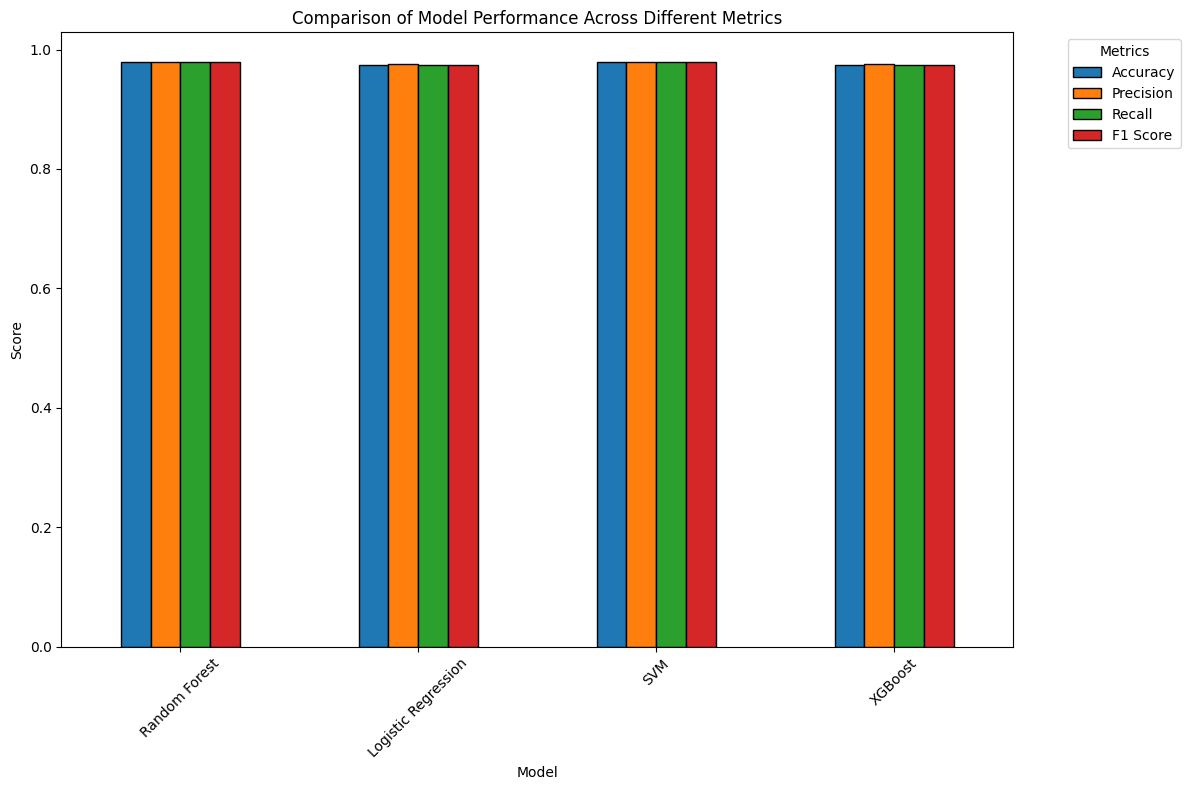

In [78]:
# Combine results from all models for comparison
results = {
    "Random Forest": rf_metrics,
    "Logistic Regression": lr_metrics,
    "SVM": svm_metrics,
    "XGBoost": xgb_metrics,
    # Add other models here if applicable
}

# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results as a table
print("Comparison of Model Performance:")
print(results_df)

# Bar plot for performance comparison
results_df.plot(kind='bar', figsize=(12, 8), edgecolor='black')
plt.title('Comparison of Model Performance Across Different Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metrics')
plt.tight_layout()
plt.show()


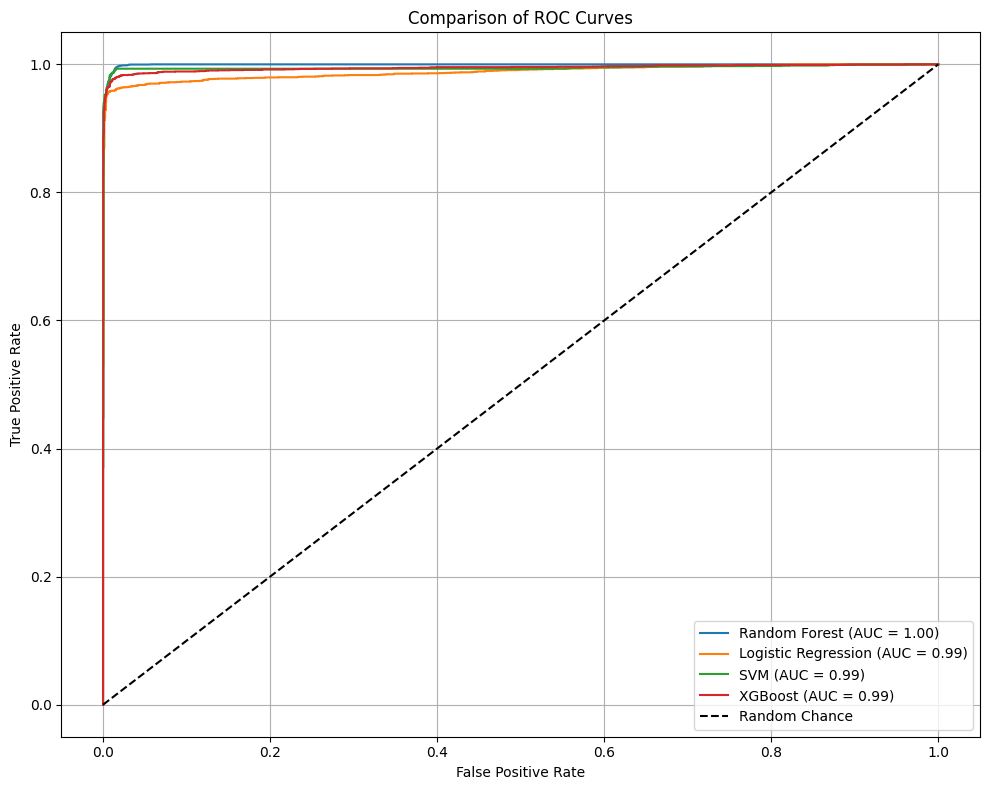

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Function to plot combined ROC Curves for multiple models
def plot_combined_roc_curves(models, model_names, X_tests, y_tests):
    plt.figure(figsize=(10, 8))
    for model, name, X_test, y_test in zip(models, model_names, X_tests, y_tests):
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
            raise ValueError(f"Model {name} does not support probability prediction.")

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('Comparison of ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.tight_layout()
    plt.show()

# List of models, their names, and test sets
models = [best_rf_model, best_lr_model, best_svm_model, best_xgb_model]
model_names = ["Random Forest", "Logistic Regression", "SVM", "XGBoost"]
X_tests = [X_count_test, X_tfidf_test, X_tfidf_test, X_count_test]
y_tests = [y_test_count, y_test_tfidf, y_test_tfidf, y_test_count]

# Call the function to plot combined ROC Curves
plot_combined_roc_curves(models, model_names, X_tests, y_tests)
